In [ ]:
import pandas as pd

df = pd.read_csv('baseDadosRafa.csv')  # Substitua pelo nome real do seu arquivo
df.head()


,ID,"('P1_a ', 'Idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_i ', 'Estado onde mora')","('P1_l ', 'Nivel de Ensino')","('P2_g ', 'Nivel')",Salário (R$),Tempo de experiência na área de dados (anos),IDH do Estado
0,1,31,Masculino,Branca,Não,Minas Gerais (MG),Doutorado ou Phd,Sênior,"R$ 14.000,00",3,"0,774"
1,2,30,Masculino,Branca,Não,Espírito Santo (ES),Graduação/Bacharelado,Pleno,"R$ 7.000,00",3,"0,771"
2,3,37,Feminino,Amarela,Não,São Paulo (SP),Graduação/Bacharelado,Júnior,"R$ 7.000,00",1,"0,806"
3,4,34,Masculino,Branca,Não,Minas Gerais (MG),Doutorado ou Phd,Júnior,"R$ 5.000,00",1,"0,774"
4,5,30,Masculino,Branca,Não,Rio de Janeiro (RJ),Estudante de Graduação,Pleno,"R$ 10.000,00",1,"0,762"


['ID', "('P1_a ', 'Idade')", "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')", "('P1_d ', 'PCD')", "('P1_i ', 'Estado onde mora')", "('P1_l ', 'Nivel de Ensino')", "('P2_g ', 'Nivel')", 'Salário  (R$)', 'Tempo de experiência na área de dados (anos)', 'IDH do Estado ']
Mean Absolute Error (MAE): R$ 2,470.05


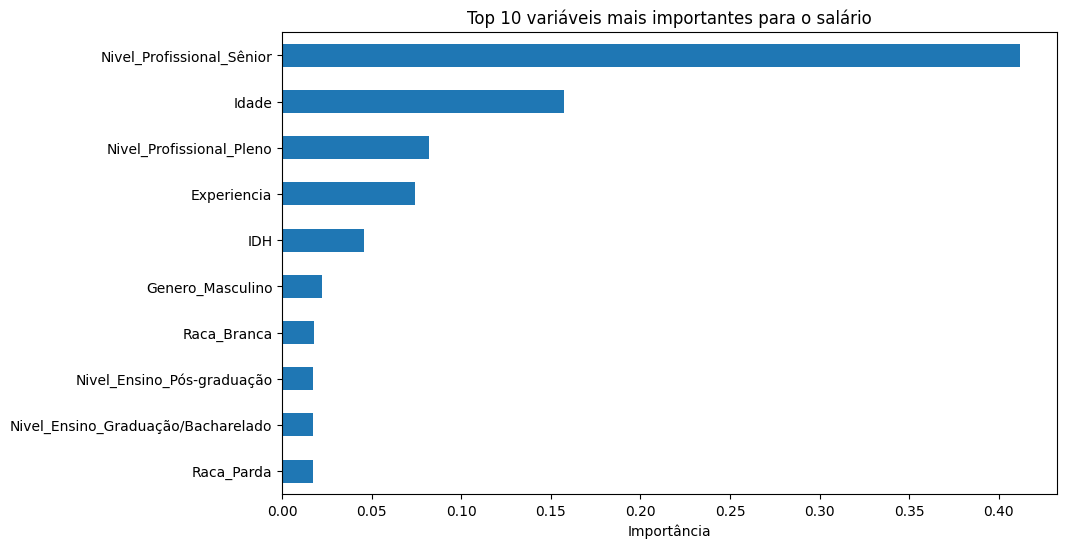

In [ ]:
# ==============================
# 1. Randon Forest
# ==============================
from google.colab import files
import pandas as pd

print(df.columns.tolist())

# ==============================
# 2. Limpeza e transformação
# ==============================

# Limpar espaços em excesso nos nomes das colunas
df.columns = df.columns.str.strip()

# Renomear colunas com nomes mais simples e consistentes
df = df.rename(columns={
    "('P1_a ', 'Idade')": 'Idade',
    "('P1_b ', 'Genero')": 'Genero',
    "('P1_c ', 'Cor/raca/etnia')": 'Raca',
    "('P1_d ', 'PCD')": 'PCD',
    "('P1_i ', 'Estado onde mora')": 'Estado',
    "('P1_l ', 'Nivel de Ensino')": 'Nivel_Ensino',
    "('P2_g ', 'Nivel')": 'Nivel_Profissional',
    "Salário  (R$)": 'Salario',
    "Tempo de experiência na área de dados (anos)": "Experiencia",
    "IDH do Estado": "IDH"
})

# ==============================
# 3. Seleção e codificação de variáveis
# ==============================

# Selecionar as colunas que vamos usar no modelo
df['Salario'] = df['Salario'].replace({'R\$': '', '\.': '', ',': '.'}, regex=True).astype(float)
df['IDH'] = df['IDH'].astype(str).str.replace(',', '.').astype(float)

X = df[['Idade', 'Genero', 'Raca', 'Estado', 'Experiencia', 'IDH', 'Nivel_Profissional', 'Nivel_Ensino']]
y = df['Salario']

# Transformar variáveis categóricas em dummies (0/1)
X = pd.get_dummies(X, drop_first=True)

# ==============================
# 4. Treinamento do modelo
# ==============================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Previsão no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): R$ {mae:,.2f}')

# ==============================
# 5. Importância das variáveis
# ==============================

import matplotlib.pyplot as plt

# Mostrar as variáveis mais importantes para o modelo
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 variáveis mais importantes para o salário')
plt.xlabel('Importância')
plt.gca().invert_yaxis()
plt.show()


Com base no gráfico de importância das variáveis gerado pelo modelo de Random Forest, é possível observar que o nível profissional é o fator mais determinante para o salário, com destaque para o cargo de Sênior, que possui a maior relevância entre todas as variáveis. A idade e o nível profissional pleno também exercem influência significativa, o que sugere que a experiência de vida e a posição ocupada no mercado têm um forte impacto na remuneração. Fatores como experiência na área, IDH do estado e gênero também aparecem como relevantes, embora em menor grau. Por fim, as variáveis de raça e nível de ensino possuem menor importância relativa, mas ainda assim contribuem para explicar diferenças salariais, o que pode indicar indícios de desigualdade social associada a esses fatores.

Mean Absolute Error (MAE) com KNN: R$ 2,679.22


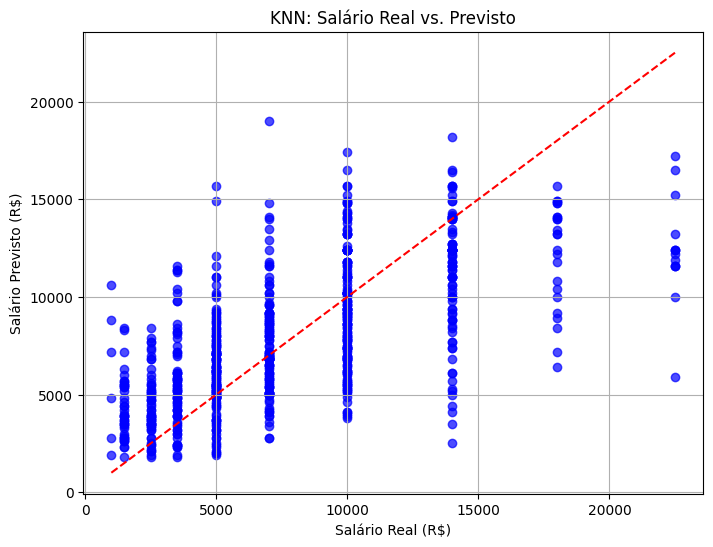

In [ ]:
# KNN
import matplotlib.pyplot as plt

# ===============================
# 3. Seleção e codificação de variáveis
# ===============================
X = df[['Idade', 'Genero', 'Raca', 'Estado', 'Experiencia', 'IDH', 'Nivel_Profissional', 'Nivel_Ensino']]
y = df['Salario']

# Transformar variáveis categóricas em variáveis dummies
X = pd.get_dummies(X, drop_first=True)

# ===============================
# 4. Normalização dos dados
# ===============================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 5. KNN Regressor
# ===============================
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
knn = KNeighborsRegressor(n_neighbors=5)  # você pode ajustar o número de vizinhos
knn.fit(X_train, y_train)

# Prever salários
y_pred = knn.predict(X_test)

# Avaliar desempenho
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) com KNN: R$ {mae:,.2f}')


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Salário Real (R$)')
plt.ylabel('Salário Previsto (R$)')
plt.title('KNN: Salário Real vs. Previsto')
plt.grid(True)
plt.show()


Modelo KNN
O Mean Absolute Error (MAE) de R$ 2.679,22 indica que, em média, as previsões do modelo KNN erram o valor real do salário em cerca de 2.679 reais.

Observando o gráfico de dispersão entre salários reais e previstos, nota-se que os pontos estão bastante dispersos ao redor da linha de referência (linha vermelha pontilhada), o que indica que o modelo captura bem a tendência geral, mas com alguma variabilidade e erros notáveis em casos específicos.

O KNN tende a suavizar as previsões, pois baseia suas decisões nos salários de profissionais semelhantes, o que pode levar a erros maiores para casos com características menos comuns.

Modelo Random Forest
O MAE de R$ 2.470,05 do Random Forest mostra que ele apresentou um erro médio menor que o KNN, indicando previsões um pouco mais precisas.

A análise da importância das variáveis mostrou que o nível profissional é a variável mais relevante para explicar o salário, seguida da idade e da experiência, o que faz sentido considerando o contexto do mercado de trabalho.

Variáveis socioeconômicas como IDH e fatores demográficos como gênero e raça aparecem com menor importância, mas ainda presentes, indicando que há uma influência, embora menor, desses aspectos na determinação do salário.

Acurácia: 0.6126373626373627

Relatório de Classificação:
               precision    recall  f1-score   support

        Alto       0.60      0.47      0.53       126
       Baixo       0.65      0.77      0.71       317
       Médio       0.56      0.51      0.53       285

    accuracy                           0.61       728
   macro avg       0.60      0.58      0.59       728
weighted avg       0.61      0.61      0.61       728


Matriz de Confusão:
 [[ 59  21  46]
 [  6 243  68]
 [ 33 108 144]]


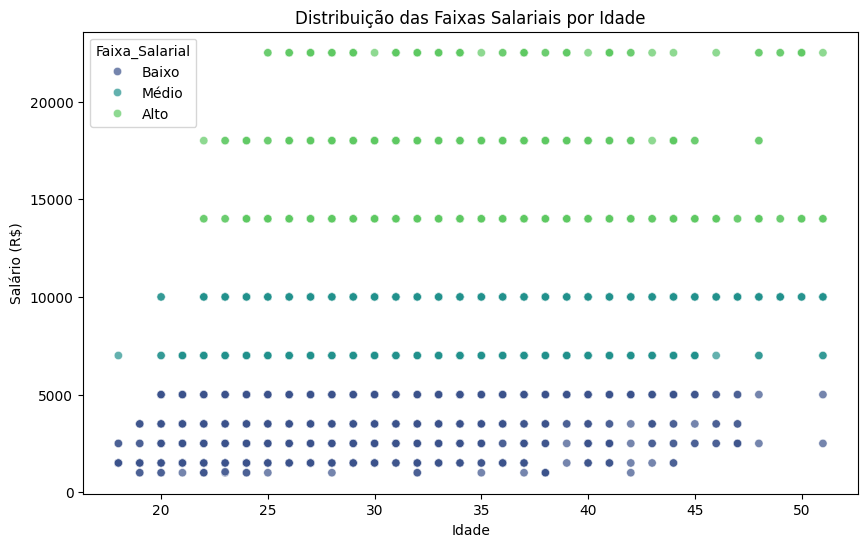

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Criar faixas salariais
df['Faixa_Salarial'] = pd.qcut(df['Salario'], q=3, labels=['Baixo', 'Médio', 'Alto'])

# 2. Preparar dados para classificação
X = df[['Idade', 'Genero', 'Raca', 'Estado', 'Experiencia', 'IDH', 'Nivel_Profissional', 'Nivel_Ensino']]
y = df['Faixa_Salarial']

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados numéricos (ajuda no KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Treinar modelo KNN Classifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# 4. Avaliar modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# 5. Visualizar a divisão das faixas salariais no conjunto original

# Para o gráfico, vamos usar o dataframe original com Idade e Salario e Faixa_Salarial
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Idade', y='Salario', hue='Faixa_Salarial', palette='viridis', alpha=0.7)
plt.title('Distribuição das Faixas Salariais por Idade')
plt.xlabel('Idade')
plt.ylabel('Salário (R$)')
plt.show()


🔷 KNN Classifier
Acurácia: 0.5206043956043956

Relatório:
               precision    recall  f1-score   support

      Júnior       0.58      0.52      0.55       227
       Pleno       0.44      0.52      0.48       273
      Sênior       0.58      0.52      0.55       228

    accuracy                           0.52       728
   macro avg       0.53      0.52      0.53       728
weighted avg       0.53      0.52      0.52       728


Matriz de Confusão:
 [[119  89  19]
 [ 64 141  68]
 [ 22  87 119]]


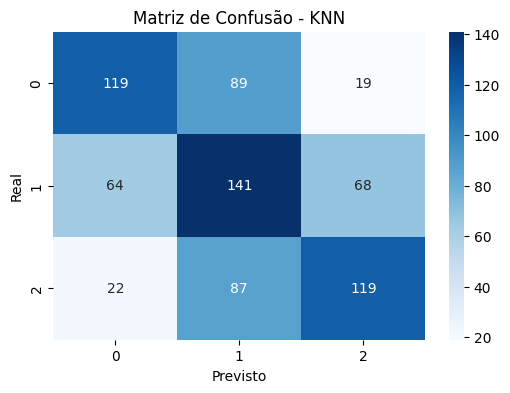


🔶 Random Forest Classifier
Acurácia: 0.5453296703296703

Relatório:
               precision    recall  f1-score   support

      Júnior       0.66      0.57      0.61       227
       Pleno       0.44      0.47      0.45       273
      Sênior       0.57      0.61      0.59       228

    accuracy                           0.55       728
   macro avg       0.56      0.55      0.55       728
weighted avg       0.55      0.55      0.55       728


Matriz de Confusão:
 [[130  80  17]
 [ 57 127  89]
 [  9  79 140]]


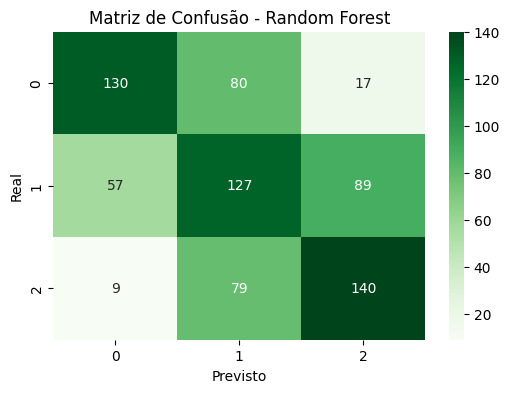

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Selecionar features (X) e target (y)
X = df[['Idade', 'Genero', 'Raca', 'Estado', 'Experiencia', 'IDH', 'Nivel_Ensino']]
y = df['Nivel_Profissional']

# 2. Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalizar variáveis numéricas (KNN precisa disso!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============== KNN ===============
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("🔷 KNN Classifier")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("\nRelatório:\n", classification_report(y_test, y_pred_knn))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))

# Visualizar a matriz de confusão - KNN
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# =============== Random Forest ===============
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔶 Random Forest Classifier")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

# Visualizar a matriz de confusão - Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Modelo base
rf = RandomForestClassifier(random_state=42)

# GridSearch com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Melhor modelo
best_rf = grid_search.best_estimator_

# Avaliar no teste
y_pred_best_rf = best_rf.predict(X_test)
print("Acurácia otimizada:", accuracy_score(y_test, y_pred_best_rf))
print("\nRelatório:\n", classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Acurácia otimizada: 0.6195054945054945

Relatório:
               precision    recall  f1-score   support

      Júnior       0.75      0.57      0.65       227
       Pleno       0.52      0.62      0.56       273
      Sênior       0.66      0.68      0.67       228

    accuracy                           0.62       728
   macro avg       0.64      0.62      0.63       728
weighted avg       0.64      0.62      0.62       728



Acurácia: 0.7005494505494505

Relatório:
               precision    recall  f1-score   support

      Júnior       0.74      0.81      0.77       227
       Pleno       0.63      0.58      0.60       273
      Sênior       0.74      0.74      0.74       228

    accuracy                           0.70       728
   macro avg       0.70      0.71      0.70       728
weighted avg       0.70      0.70      0.70       728


Matriz de Confusão:
 [[183  40   4]
 [ 58 159  56]
 [  5  55 168]]


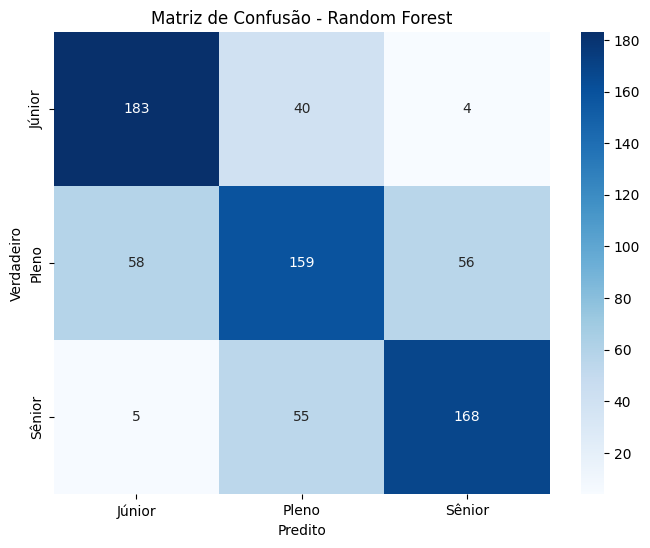

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Selecionar apenas as duas variáveis
X = df[['Faixa_Salarial', 'Experiencia']]
X = pd.get_dummies(X, drop_first=True)

# Variável alvo
y = df['Nivel_Profissional']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar (não é estritamente necessário aqui, mas mantemos por padrão)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar modelo (Random Forest por ser mais robusto)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plotar a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()
